In [ ]:
#import pandas (for data importing) and numpy (for analysis)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



#set more max rows and columns to display

pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)



#import seaborn visualization and allow to show in python notebook

import seaborn as sns



#import iPython package... should allow to display nicely outside of Python, too.
from IPython.display import display, HTML



# import pitchf/x file with stadium data, and column headers to index 0 row. Use "_short" version for every 10th row.

data = pd.read_csv('all-stadiums_short.csv',header=0,index_col=0)

# data = pd.read_csv('all-stadiums.csv',header=0,index_col=0)

df = pd.DataFrame(data)

print(df.shape)



# import legend. Print at any time for reference.

legend = pd.read_csv('legend_v1.csv',header=0,index_col=0)
display(legend)



print("Before removing blank values:")

display(df.describe())



#clean out blank and 0 values; some pitch data wasn't captured

df = df[pd.notnull(df['start_speed'])]



#create dict for strike-zone mapping

zone_dict = {"1":"SZ:TOP-LEFT", "2":"SZ:TOP-CENTER","3":"SZ:TOP-RIGHT",

            "4":"SZ:MID-LEFT","5":"SZ:MID-CENTER","6":"SZ:MID-RIGHT",

            "7":"SZ:BOTTOM-LEFT","8":"SZ:BOTTOM-CENTER","9":"SZ:BOTTOM-RIGHT",

            "11":"OUTSIDE:TOP-LEFT","12":"OUTSIDE:TOP-RIGHT",

            "13":"OUTSIDE:BOTTOM-LEFT","14":"OUTSIDE:BOTTOM-RIGHT"}



#define function to map zones. note need to turn back to string to match dict.

def map_zone(zone_num):

    if str(int(zone_num)) in zone_dict.keys() :

        return zone_dict[str(int(zone_num))]

    else :

        return "no mapping"



print (map_zone(1))



"CREATE ADDITIONAL SERIES"

#creates total break distance across x,z coordinates as (sqrt(x^2+z^2))

df['break_total'] = (df['pfx_x']**2+df['pfx_z']**2)**(1/2)

#creates count column

df['count'] = 1

#create zone mapping series

df['mapped_zone'] = df.zone.map(map_zone)



print(str(int(df.zone[0])))

print(df.mapped_zone[0])



#show data head, describe data

display(df.head())

print("After removing blank values:")

display(df.describe())





df.groupby('zone').sum()

display(df.groupby(['zone','mapped_zone','pitch_result'])[['count']].sum())



facetgrid = sns.FacetGrid(df, col="pitch_type")

facetgrid.map(plt.scatter, "break_total","spin_rate")



# plt.plot(df['spin_rate'],df['break_total'],".")


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 500)


# Import and Legend

In [7]:
data = pd.read_csv("all-stadiums_short.csv")

In [8]:
data.pitch_id.value_counts()

4       245
3       243
5       190
12      157
11      150
50      146
6       146
202     145
18      144
104     143
361     142
19      142
147     141
10      141
140     141
136     140
55      140
265     140
15      140
256     139
36      138
160     138
58      138
91      137
337     136
16      136
240     136
241     135
215     135
34      134
       ... 
1049      1
891       1
965       1
837       1
940       1
858       1
986       1
1066      1
955       1
987       1
1115      1
1030      1
1018      1
1044      1
1081      1
917       1
1070      1
942       1
953       1
790       1
1017      1
1005      1
1004      1
877       1
1095      1
967       1
855       1
919       1
1132      1
895       1
Name: pitch_id, dtype: int64

In [5]:
legend = pd.read_csv("legend_v1.csv")

NameError: name 'pd' is not defined

In [4]:
legend

field                               description of field  \
0                   name                                       PITCHER NAME   
1              player_id                                UNIQUE PITCHER ID #   
2             pitch_type     PITCH THROWN (FASTBALL, CHANGEUP, SLIDER, ETC)   
3           pitch_result  RESULT OF PITCH (SWINGING STRIKE, BALL IN PLAY...   
4           atbat_result  RESULT OF AT BAT (STRIKEOUT, GROUNDOUT, DOUBLE...   
5            start_speed                INITIAL VELOCITY AT PITCHER RELEASE   
6                     z0                          HEIGHT OF PITCHER RELEASE   
7                     x0  (LEFT)/RIGHT DISTANCE TO CENTER OF PITCHER REL...   
8                  pfx_x  (LEFT)/RIGHT BREAK BETWEEN PITCHER RELEASE AND...   
9                  pfx_z  (DOWN)/UP BREAK BETWEEN PITCHER RELEASE AND HO...   
10                    px  (LEFT)/RIGHT DISTANCE TO CENTER OF PLATE WHEN ...   
11                    pz                     HEIGHT WHEN BALL CROSSES PLATE   
12           break_angle                               ANGLE OF PITCH BREAK   
13          break_length  GREATEST DISTANCE BETWEEN TRAJECTORY OF PITCH ...   
14             spin_rate                            REVOLUTIONS OF BASEBALL   
15              spin_dir                        ANGLE OF AXIS OF REVOLUTION   
16                  zone  PRE-MAPPED ZONE OF WHICH STRIKE ZONE BIN BALL ...   
17                 balls            NUMBER OF BALLS IN COUNT (BEFORE PITCH)   
18               strikes          NUMBER OF STRIKES IN COUNT (BEFORE PITCH)   
19                  outs             NUMBER OF OUTS IN COUNT (BEFORE PITCH)   
20                  play           DETAILED DESCRIPTION OF RESULT OF AT BAT   
21             game_date                                          GAME DATE   
22                inning                                    INNING OF PITCH   
23         inning_topbot                            TOP OR BOTTOM OF INNING   
24                   tfs                                                TBD   
25              tfs_zulu                                 TIME STAMP OF GAME   
26               catcher                                    CATCH UNIQUE ID   
27                umpire                                   UMPIRE UNIQUE ID   
28           umpire_name                                        UMPIRE NAME   
29   stolen_base_attempt                      STOLEN BASE ATTEMPT ON PITCH?   
30   stolen_base_success           SUCCESSFUL STOLEN BASE ATTEMPT ON PITCH?   
31      batted_ball_type  TYPE OF HIT CONNECTION (GROUNDBALL, FLY BALL, ...   
32           Unnamed: 32                                                TBD   
33                 angle                                                TBD   
34  batted_ball_velocity                                    VELOCITY OF HIT   
35             direction                                                TBD   
36                  hc_x                                                TBD   
37                  hc_y                                                TBD   
38              pitch_id                UNIQUE PITCH IDENTIFICATION NUMBER?   
39         distance_feet          LANDING POINT OF HIT? WHERE BALL STOPPED?   
40               stadium                        STADIUM PITCH WAS THROWN AT   

   unit of measurement  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
5                  NaN  
6                   FT  
7                   FT  
8                   IN  
9                   IN  
10                  FT  
11                  FT  
12             DEGREES  
13                  IN  
14            REV/MIN?  
15             DEGREES  
16                 NaN  
17                 NaN  
18                 NaN  
19                 NaN  
20                 NaN  
21                 NaN  
22                 NaN  
23                 NaN  
24                 NaN  
25                 NaN  
26                 NaN  


# Pitch Types

In [5]:
pitch_type = data.groupby('pitch_type')

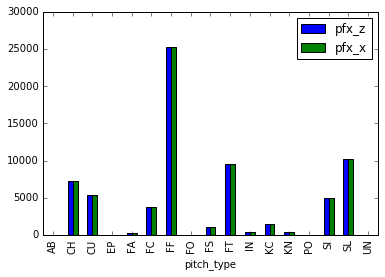

In [6]:
pitch_type['pfx_z','pfx_x'].count().plot(kind = 'bar')

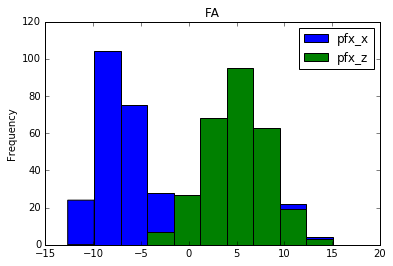

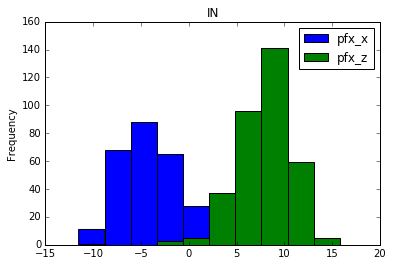

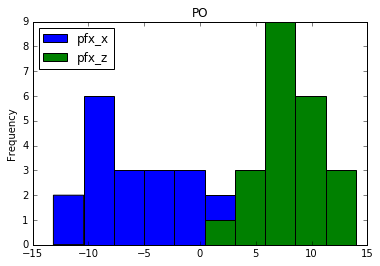

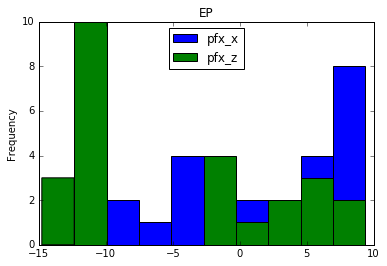

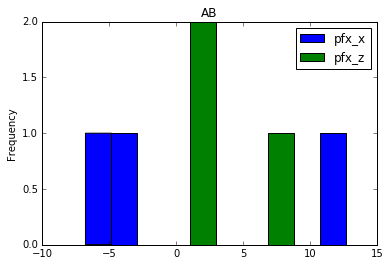

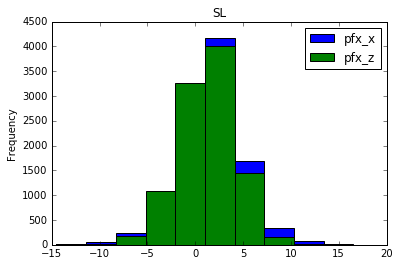

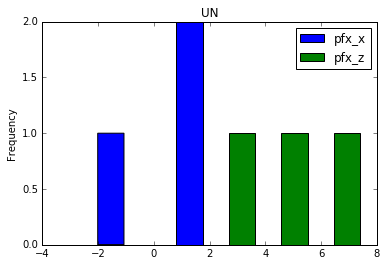

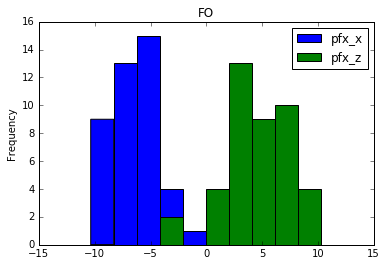

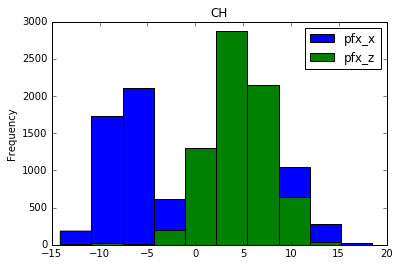

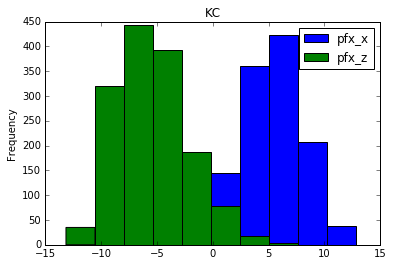

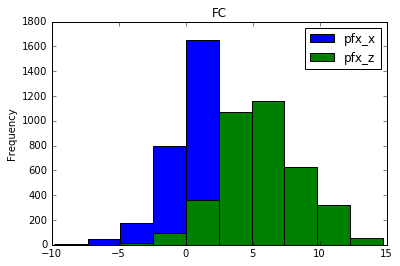

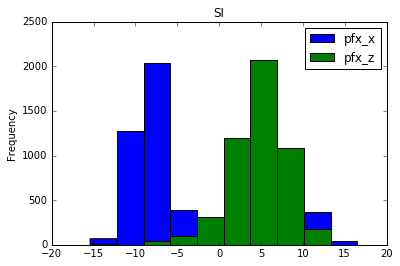

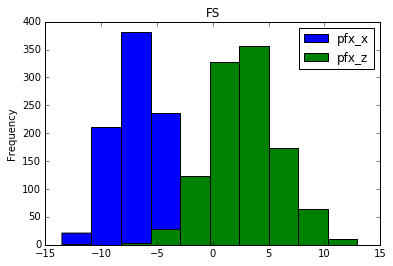

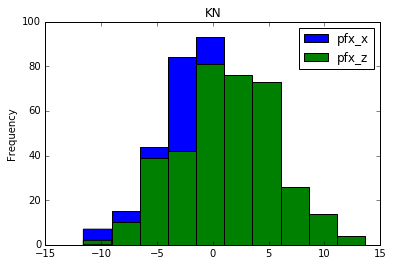

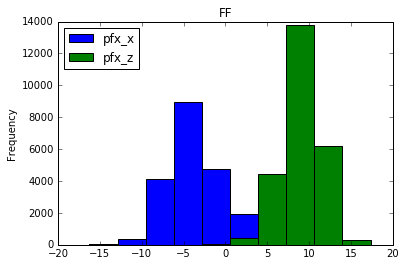

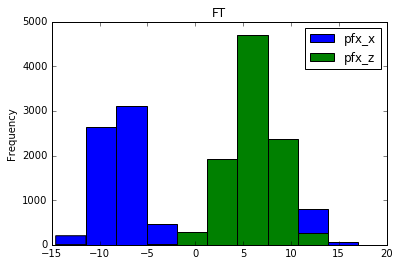

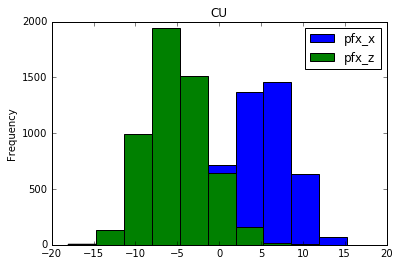

In [90]:
for pitch in pitch_type.groups:
    pitch_type.get_group(pitch)[['pfx_x','pfx_z']].plot(kind = 'hist', title = pitch)

In [7]:
pitch_type.agg(np.mean)

Unnamed: 0      player_id  start_speed        z0        x0  \
pitch_type                                                                  
AB          512573.333333  541349.333333    87.133333  5.575333 -1.987000   
CH          350034.037903  497454.095726    83.213349  5.839569 -0.444276   
CU          338078.612856  503805.295530    77.764813  6.069556 -0.716233   
EP          359352.400000  506458.280000    67.948000  6.390480 -1.064160   
FA          366301.843972  540558.656028    89.317376  5.822433 -0.981982   
FC          329106.169006  489159.478132    88.000027  5.950792 -0.828716   
FF          360103.248165  509657.878397    92.449050  5.857403 -0.697342   
FO          466018.809524  565794.500000    85.714286  5.969048 -1.712310   
FS          440577.276909  484941.729531    84.236983  5.949737 -1.129911   
FT          343993.904017  491009.755243    91.786854  5.822526 -0.481491   
IN          336707.225434  496021.939306    72.679480  6.650237 -0.638621   
KC          365052.351351  491464.250676    80.173311  5.971714 -0.887069   
KN          310760.027248  328728.662125    75.729973  6.025872 -0.649183   
PO          277722.727273  492557.863636    85.595455  5.822864 -1.191409   
SI          331001.655629  476888.330925    90.750371  5.623267 -0.786999   
SL          350912.892392  501804.195143    84.275629  5.870671 -0.786447   
UN          168346.666667  502576.000000    42.700000  8.641333 -0.313000   

               pfx_x     pfx_z        px        pz  break_angle  break_length  \
pitch_type                                                                      
AB          0.483333  4.537333 -0.114000  2.045333     5.200000      7.166667   
CH         -1.452850  4.601734 -0.125894  1.863648     4.473330      7.671186   
CU          3.218166 -5.068647 -0.007460  1.857233    -6.246287     12.399982   
EP          2.216960 -4.615360 -0.276440  2.262480    -1.900000     15.196000   
FA         -4.361727  4.959355 -0.248021  1.807103    15.175177      6.526241   
FC          1.224212  5.653977  0.126578  2.318471    -5.969843      5.782721   
FF         -1.677789  9.138887 -0.036221  2.553467     8.914818      4.102023   
FO         -6.380214  4.615048 -0.462595  1.547833    19.469048      7.073810   
FS         -4.764037  2.865495 -0.230748  1.711293    13.597976      7.957590   
FT         -2.215510  6.114264 -0.177982  2.329944     9.196182      5.894940   
IN         -1.934046  7.963942  0.131566  4.637436     4.459249      8.886705   
KC          3.719995 -5.443106  0.073360  1.811616    -7.446554     11.922095   
KN         -0.317005  1.316831 -0.026030  2.603259     0.250954     10.268120   
PO         -4.563818  8.055636  1.405091  4.050545    14.618182      5.581818   
SI         -4.050311  4.778622 -0.095554  2.297057    13.559302      6.459402   
SL          1.701112  1.277723  0.168773  1.903543    -5.472799      8.260609   
UN         -0.040000  5.070000 -0.622000  5.185667    -0.066667     31.266667   

              spin_rate    spin_dir       zone     balls   strikes      outs  \
pitch_type                                                                     
AB          1762.309000  187.119333  12.666667  0.333333  1.000000  1.000000   
CH          1684.492515  197.842774  10.834140  0.903444  0.939549  1.029188   
CU          1311.895512  118.648605  10.579793  0.644256  1.031215  1.038050   
EP          1476.254800  108.852680  11.000000  0.760000  1.040000  1.120000   
FA          1820.928255  217.097429  11.081560  0.893617  1.042553  1.028369   
FC          1229.866624  165.333845   9.823974  0.900648  0.870410  1.014039   
FF          2119.108958  190.301234   9.144297  0.905455  0.823765  0.984844   
FO          1542.307571  233.625524  12.190476  0.833333  1.190476  0.809524   
FS          1396.923962  226.644328  10.954922  0.927323  1.092916  1.028519   
FT          2121.365923  197.097969   9.756182  0.897966  0.765571  0.974231   
IN          1524.073798  194.232798  11.578035  1.6

In [8]:
data['break_total'] = (data['pfx_x']**2+data['pfx_z']**2)**(1/2)

In [9]:
data.groupby(['player_id','pitch_type']).agg({'pfx_x':[np.mean, np.std], 'pfx_z':[np.mean, np.std], 'break_total':[np.mean, np.std]})

pfx_z                pfx_x           break_total  \
                           mean       std       mean       std        mean   
player_id pitch_type                                                         
112526    CH           4.455625  2.258737  -7.830625  1.894168    9.306464   
          FF           9.076286  1.593663  -4.168514  1.404417   10.101663   
          FT           4.598783  1.681731  -9.078561  1.470980   10.321181   
          IN           6.667000  2.873682  -1.820000  1.081873    6.914254   
          SL           1.130556  1.788858   1.601000  1.525600    2.684652   
115629    CH           6.552000  0.336583  -8.366500  1.871712   10.645525   
          CU          -6.020000       NaN   6.050000       NaN    8.534805   
          FF           7.818122  1.839271  -7.151951  2.124597   10.824923   
          IN           2.390000       NaN  -5.203000       NaN    5.725671   
          SL           4.903800  1.396497   1.132700  1.390474    5.194752   
136600    CU          -7.240000       NaN  -7.390000       NaN   10.345516   
          SI           7.241571  1.950360  11.026571  1.812092   13.358263   
          SL           4.360200  2.030180   0.532800  1.155010    4.460749   
150116    CH           5.798000  0.442120   8.262000  1.652035   10.150918   
          CU          -8.523308  1.002614  -4.101231  1.284055    9.539958   
          FC           4.675000  2.496087  -1.515000  0.643467    4.915811   
          FF           9.853333  1.087727   3.844444  1.329484   10.662992   
          FT           7.285550  1.423464   8.081600  1.216073   10.946815   
          SL           2.903846  1.670601  -1.208462  1.258993    3.443591   
150302    CH           1.248524  2.103660  -7.499905  2.217357    7.856035   
          IN           4.830000       NaN  -8.700000       NaN    9.950824   
          SI           3.381362  1.809584 -10.346085  2.101435   11.055104   
          SL           4.874000  1.317111   0.137000  2.088578    5.277686   
150359    CH           2.267600  1.742573  -6.419320  1.694303    7.016419   
          FF           6.889304  1.854464  -4.904174  0.844090    8.510732   
          IN           7.650000       NaN  -4.160000       NaN    8.707933   
          KC          -4.879343  1.461132   4.710627  1.909434    6.878339   
          SI           4.562866  1.347434  -7.832261  1.544761    9.158998   
217096    CH           3.910500  2.617223   6.402250  1.998041    7.726871   
          CU         -11.586750  1.109668  -1.995000  1.238567   11.818903   
...                         ...       ...        ...       ...         ...   
628333    CU          -5.644833  2.912208   6.974708  2.112532    9.386452   
          EP         -11.937250  1.180198   7.310667  1.375417   14.055357   
          FC           7.097900  1.405180   0.578350  1.052720    7.191849   
          FF           7.218654  1.349003  -2.061558  1.495910    7.639505   
          IN           6.310000       NaN  -8.320000       NaN   10.442150   
          PO           5.540000       NaN   0.810000       NaN    5.598902   
          SI           4.207358  1.977433  -7.261284  1.973339    8.664956   
          SL           4.474500  1.541622   1.022786  2.382356    5.106636   
628452    CH           1.112000  1.744012  -7.498750  2.965157    8.066430   
          CU          -1.200000       NaN   7.270000       NaN    7.368372   
          FF           7.781464  1.815708  -5.302821  2.159274    9.661228   
          FT           3.970000       NaN  -9.570000       NaN   10.360782   
          SI           4.173638  2.284800  -9.181569  1.545283   10.306706   
          SL          -0.830044  1.872832   6.012644  1.765407    6.376700   
641490    CH           4.170000       NaN  10.050000       NaN   10.880781   
          FF           5.458300  1.222392   9.833050  1.714639   11.358027   
          SL          -2.998333  1.239921  -0.898111  1.137531    3.341939   
641627    CU          -6.101857  1.192315   6.04

In [10]:
# Create within pitcher and within pitch type mean and std movement
def avg_movement(dataframe):
    dataframe['x_avg'] = dataframe.pfx_x.mean()
    dataframe['z_avg'] = dataframe.pfx_z.mean()
    dataframe['break_avg'] = dataframe.break_total.mean()
    dataframe['x_std'] = dataframe.pfx_x.std()
    dataframe['z_std'] = dataframe.pfx_z.std()
    dataframe['break_std'] = dataframe.break_total.std()
    return dataframe

In [11]:
within_pitcher = data.groupby(['player_id','pitch_type']).apply(avg_movement)

In [25]:
within_pitcher.head(10)

Unnamed: 0                            name  player_id pitch_type  \
0           0  Aaron Sanchez                      592717         FT   
1          10  Adam Warren                        476589         FF   
2          20  Adam Warren                        476589         FF   
3          30  Adam Warren                        476589         SL   
4          40  Adam Warren                        476589         CU   
5          50  Addison Reed                       592665         FF   
6          60  Addison Reed                       592665         FF   
7          70  Al Alburquerque                    456379         SL   
8          80  Al Alburquerque                    456379         SL   
9          90  Al Alburquerque                    456379         FT   

      pitch_result atbat_result  start_speed     z0     x0  pfx_x    ...      \
0  In play, out(s)    Groundout         97.1  6.141 -1.200 -8.790    ...       
1             Ball    Strikeout         95.2  5.772 -1.043 -1.087    ...       
2             Ball    Strikeout         94.0  5.823 -1.328 -2.981    ...       
3    Called Strike    Strikeout         87.0  5.954 -1.603  3.117    ...       
4  In play, out(s)    Groundout         79.4  6.193 -1.373  0.692    ...       
5             Ball       Flyout         92.0  5.701 -1.933 -3.226    ...       
6             Ball       Flyout         91.1  5.593 -2.139 -4.518    ...       
7             Foul    Strikeout         84.6  5.798 -0.563  1.549    ...       
8     Ball In Dirt         Walk         86.0  5.503 -0.380 -0.373    ...       
9  In play, out(s)    Groundout         91.9  5.677 -0.461 -9.633    ...       

   pitch_id  distance_feet  stadium  break_total     x_avg      z_avg  \
0       614            NaN   angels    10.826195 -9.561418   5.382868   
1       401            NaN   angels    10.385045 -2.581614  10.160702   
2       448            NaN   angels     9.951000 -2.581614  10.160702   
3       449            NaN   angels     5.597222  3.718708   4.147097   
4       388              0   angels     4.680439  4.962333  -5.603333   
5       603            294   angels    10.684647 -3.010338   9.246431   
6       604            294   angels    11.093681 -3.010338   9.246431   
7       549            NaN   angels     2.725885  0.539102   3.083542   
8       519            NaN   angels     4.018349  0.539102   3.083542   
9       501              0   angels    12.001319 -8.429000   7.565531   

   break_avg     x_std     z_std  break_std  
0  11.127020  1.516917  1.871969   1.533874  
1  10.574302  1.381970  1.263285   1.249131  
2  10.574302  1.381970  1.263285   1.249131  
3   5.812585  1.757807  1.431643   1.530257  
4   7.675316  2.642962  1.284937   2.367172  
5   9.814998  1.355946  1.269772   1.283587  
6   9.814998  1.355946  1.269772   1.283587  
7   3.605078  1.743770  1.414410   1.337324  
8   3.605078  1.743770  1.414410   1.337324  
9  11.378584  1.151332  1.264269   1.303371  

[10 rows x 49 columns]

In [ ]:
# create absolute value z score for pitch movement

In [12]:
within_pitcher['absolute_z_break'] = abs((within_pitcher.break_total - within_pitcher.break_avg) / within_pitcher.break_std)

In [13]:
within_pitcher['absolute_z_x'] = abs((within_pitcher.pfx_x - within_pitcher.x_avg) / within_pitcher.x_std)

In [14]:
within_pitcher['absolute_z_z'] = abs((within_pitcher.pfx_z - within_pitcher.z_avg) / within_pitcher.z_std)

In [15]:
within_pitcher['x_zscore'] = (within_pitcher.pfx_x - within_pitcher.x_avg) / within_pitcher.x_std
within_pitcher['az_zscore'] = (within_pitcher.pfx_z - within_pitcher.z_avg) / within_pitcher.z_std
within_pitcher['break_zscore'] = (within_pitcher.break_total - within_pitcher.break_avg) / within_pitcher.break_std

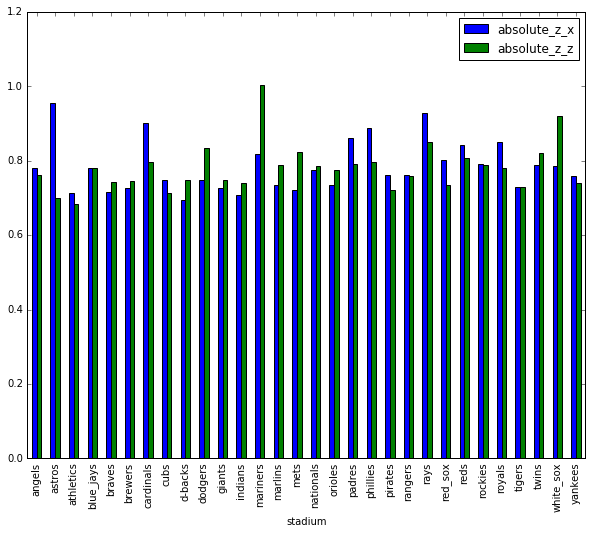

In [16]:
within_pitcher.groupby('stadium')['absolute_z_x','absolute_z_z' ].mean().plot(kind = 'bar', figsize = (10,8))

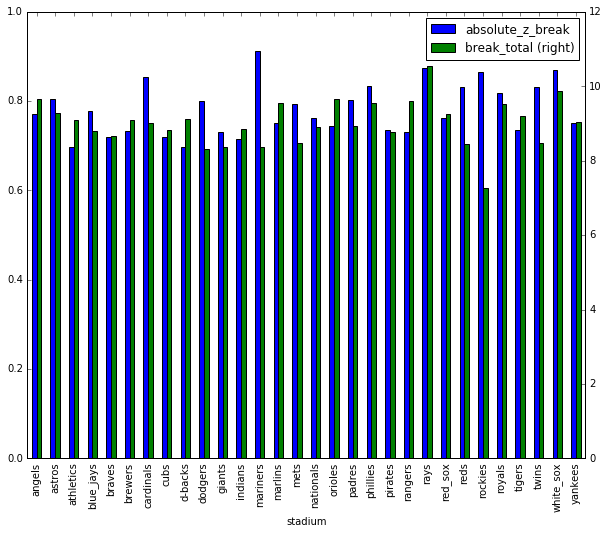

In [70]:
within_pitcher.groupby('stadium')[['absolute_z_break', 'break_total']].mean().plot(kind = 'bar', figsize = (10,8), secondary_y = ['break_total'])

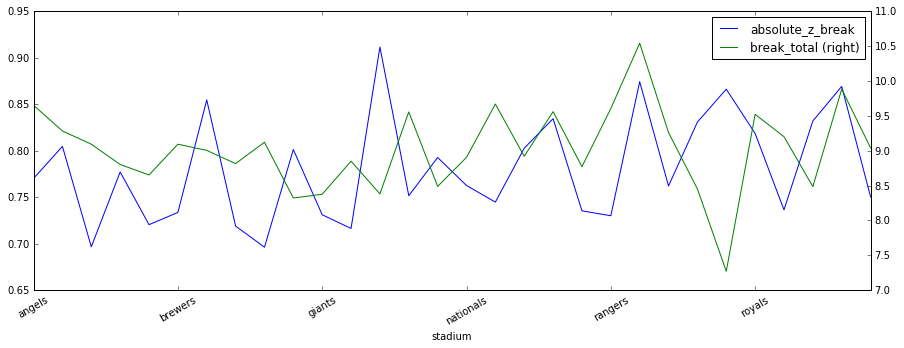

In [86]:
within_pitcher.groupby('stadium')[['absolute_z_break', 'break_total']].mean().plot(secondary_y = ['break_total'], rot = 30, figsize = (15,5))

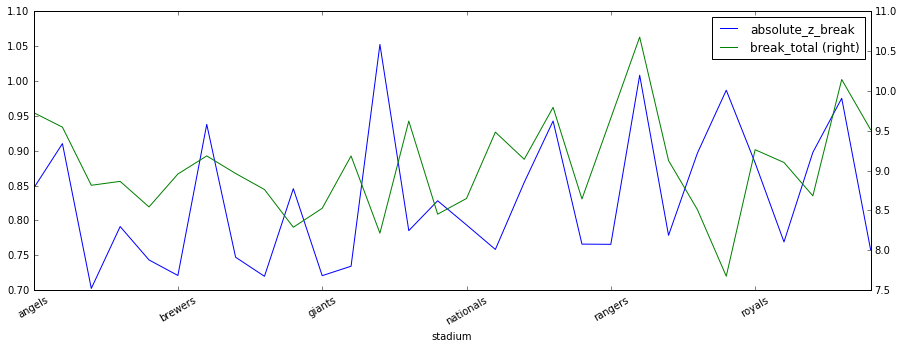

In [98]:
# Use just pitchers who are away. Exact same trend
within_pitcher[within_pitcher.inning_topbot == 'bot'].groupby('stadium')[['absolute_z_break', 'break_total']].mean().plot(secondary_y = ['break_total'], rot = 30, figsize = (15,5))

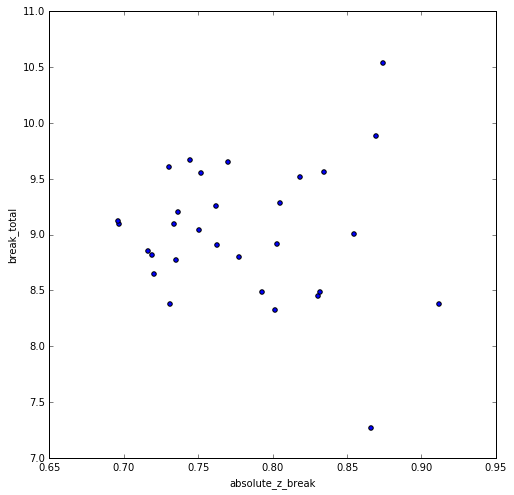

In [17]:
stadium_df = pd.DataFrame(within_pitcher.groupby('stadium')[['absolute_z_break', 'break_total', 'break_zscore']].mean())
stadium_df.plot(x = 'absolute_z_break', y = 'break_total', kind = 'scatter',figsize = (8,8))

In [18]:
stadium_df.corr()

absolute_z_break  break_total  break_zscore
absolute_z_break          1.000000    -0.053143     -0.109759
break_total              -0.053143     1.000000      0.906579
break_zscore             -0.109759     0.906579      1.000000

What drives the difference between the break_total mean and its within pitcher/pitch zscore mean by stadium? There is absolutely no correlation between the two (r2 = -.05). The z score accounts for each pitcher's pitch's unique movement, and compares each observation to this overall mean, and is standardized across pitchers using the std. The z score for this shouldnt be absolute value since we did the pythag distance. shit. okay. 

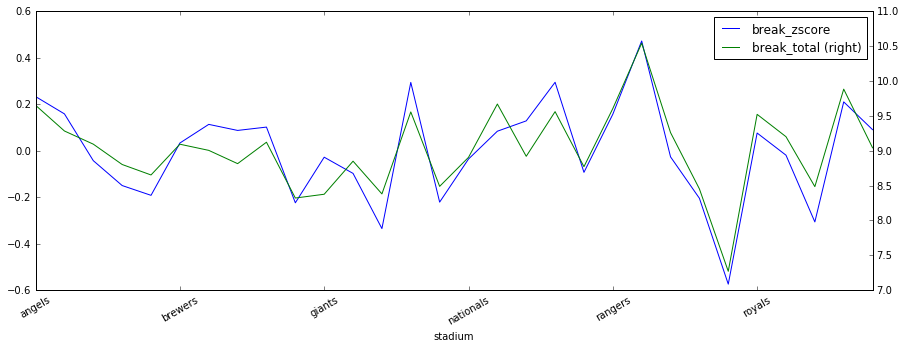

In [19]:
within_pitcher.groupby('stadium')[['break_zscore', 'break_total']].mean().plot(secondary_y = ['break_total'], rot = 30, figsize = (15,5))

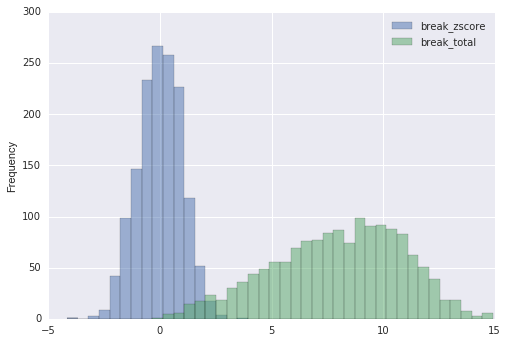

In [397]:
within_pitcher[within_pitcher.pitch_type == 'KC'][['break_zscore', 'break_total']].plot(kind = 'hist', alpha = .5, bins = 40)

In [401]:
within_pitcher[within_pitcher.pitch_type == 'KC']['break_total'].mean()
within_pitcher[within_pitcher.pitch_type == 'KC']['break_total'].std() * 1.5

4.361107050877242

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


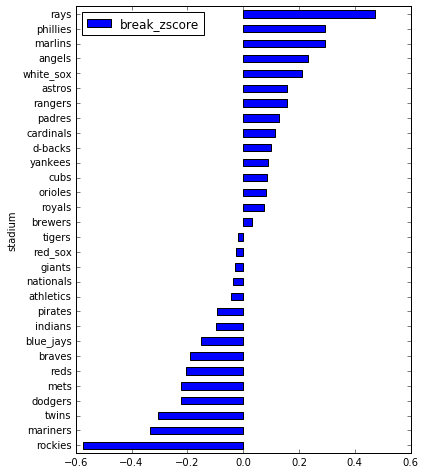

In [296]:
pd.DataFrame(within_pitcher.groupby('stadium')['break_zscore'].mean()).sort('break_zscore').plot(kind = 'barh', figsize = (6,8))

In [262]:
home_away = pd.DataFrame(within_pitcher[within_pitcher.inning_topbot == 'bot'].groupby('stadium')['break_zscore'].mean())

In [277]:
home_away.rename(columns = {'break_zscore': 'just_away'}, inplace = True)

In [279]:
home_away['just_home'] = pd.DataFrame(within_pitcher[within_pitcher.inning_topbot == 'top'].groupby('stadium')['break_zscore'].mean())

In [281]:
home_away['combined'] = pd.DataFrame(within_pitcher.groupby('stadium')['break_zscore'].mean())

In [283]:
home_away.corr()

just_away  just_home  combined
just_away   1.000000   0.941205  0.992632
just_home   0.941205   1.000000  0.975164
combined    0.992632   0.975164  1.000000

In [373]:
home_away.tail(10)

just_away  just_home  combined
stadium                                  
rangers     0.174547   0.139855  0.156775
rays        0.648956   0.306122  0.471953
red_sox    -0.030238  -0.022738 -0.026499
reds       -0.246160  -0.164996 -0.204602
rockies    -0.792548  -0.371638 -0.573908
royals      0.090261   0.062748  0.076034
tigers     -0.034630  -0.004424 -0.019290
twins      -0.318077  -0.294976 -0.306375
white_sox   0.355934   0.075906  0.209991
yankees     0.107852   0.073384  0.090448

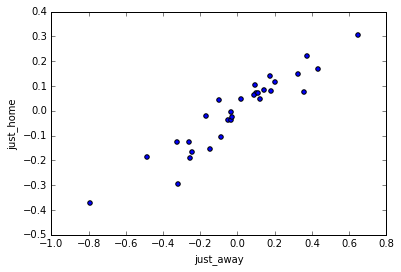

In [284]:
home_away.plot(kind = 'scatter', x = 'just_away', y = 'just_home')

There it is. Tight correlation

In [20]:
within_pitcher.groupby('stadium')['break_zscore'].mean()

stadium
angels       0.232842
astros       0.158357
athletics   -0.042883
blue_jays   -0.149868
braves      -0.191955
brewers      0.032977
cardinals    0.113192
cubs         0.087216
d-backs      0.101545
dodgers     -0.224084
giants      -0.027937
indians     -0.097655
mariners    -0.334976
marlins      0.293761
mets        -0.221153
nationals   -0.035845
orioles      0.083836
padres       0.128244
phillies     0.294301
pirates     -0.093100
rangers      0.156775
rays         0.471953
red_sox     -0.026499
reds        -0.204602
rockies     -0.573908
royals       0.076034
tigers      -0.019290
twins       -0.306375
white_sox    0.209991
yankees      0.090448
Name: break_zscore, dtype: float64

In [290]:
within_pitcher.groupby('stadium')['break_zscore'].mean().plot(kind = 'bar', figsize = (10,8), sort_columns = Reverse)

NameError: name 'Reverse' is not defined

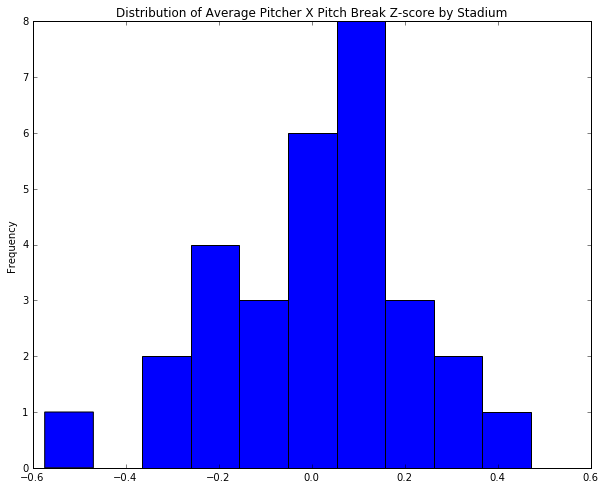

In [102]:
within_pitcher.groupby('stadium')['break_zscore'].mean().plot(kind = 'hist', figsize = (10,8), title = "Distribution of Average Pitcher X Pitch Break Z-score by Stadium")

In [22]:
#Pull in elevation
altitudes = pd.read_csv('stadium_altitudes.csv', index_col = 0)
stadium_df = stadium_df.join(altitudes)

In [288]:
stadium_df.altitude.describe()

count      30.000000
mean      517.600000
std       944.560602
min         9.000000
25%        42.500000
50%       257.000000
75%       611.000000
max      5183.000000
Name: altitude, dtype: float64

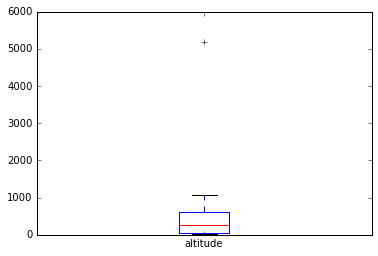

In [287]:
stadium_df.altitude.plot(kind = 'box')

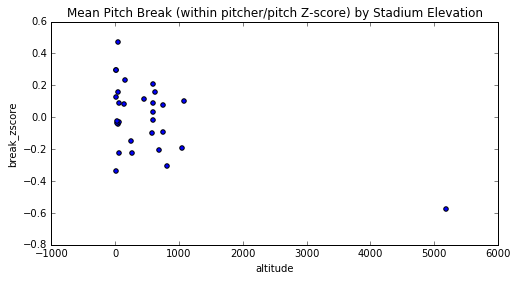

In [23]:
stadium_df.plot(x = 'altitude', y = 'break_zscore', kind = 'scatter',figsize = (8,4), title = 'Mean Pitch Break (within pitcher/pitch Z-score) by Stadium Elevation')
plt.savefig('elevation_break_scatter.png')

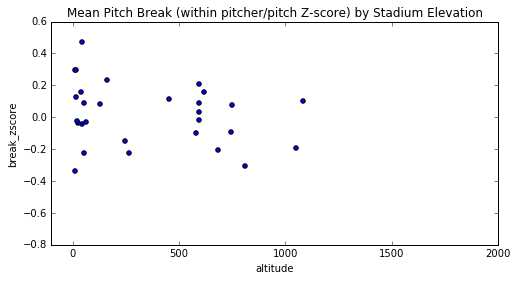

In [24]:
stadium_df.plot(x = 'altitude', y = 'break_zscore', kind = 'scatter',figsize = (8,4), xlim = (-100, 2000),title = 'Mean Pitch Break (within pitcher/pitch Z-score) by Stadium Elevation')
plt.savefig('elevation_break_scatter2.png')

In [331]:
stadium_df.corr()

absolute_z_break  break_total  break_zscore  altitude  \
absolute_z_break          1.000000    -0.053143     -0.109759  0.174947   
break_total              -0.053143     1.000000      0.906579 -0.549419   
break_zscore             -0.109759     0.906579      1.000000 -0.538709   
altitude                  0.174947    -0.549419     -0.538709  1.000000   
FT                       -0.128916     0.860804      0.933540 -0.487556   
FF                       -0.149127     0.864113      0.955008 -0.378070   
SL                        0.113230     0.515483      0.545120 -0.353336   
CU                       -0.001875     0.120593      0.107916 -0.636565   
CH                       -0.158722     0.837484      0.927404 -0.551388   
FA                       -0.250375     0.210724      0.247630 -0.288904   
SI                       -0.091019     0.701897      0.797094 -0.364593   
IN                        0.012992     0.230932      0.341435 -0.016538   
FC                       -0.179773     0.680145      0.807815 -0.212521   
FS                       -0.090187     0.404493      0.497007 -0.333799   
KC                       -0.109065     0.211678      0.142194 -0.688150   
PO                             NaN          NaN           NaN       NaN   
FO                        0.010526    -0.195200     -0.156213  0.293367   
EP                       -0.175511    -0.002280     -0.027509 -0.247440   
KN                        0.252132     0.151490      0.200564  0.221955   
UN                             NaN          NaN           NaN       NaN   
AB                             NaN          NaN           NaN       NaN   

                        FT        FF        SL        CU        CH        FA  \
absolute_z_break -0.128916 -0.149127  0.113230 -0.001875 -0.158722 -0.250375   
break_total       0.860804  0.864113  0.515483  0.120593  0.837484  0.210724   
break_zscore      0.933540  0.955008  0.545120  0.107916  0.927404  0.247630   
altitude         -0.487556 -0.378070 -0.353336 -0.636565 -0.551388 -0.288904   
FT                1.000000  0.923194  0.314562 -0.040734  0.956500  0.297500   
FF                0.923194  1.000000  0.351378 -0.166984  0.917933  0.354097   
SL                0.314562  0.351378  1.000000  0.560153  0.309065 -0.187230   
CU               -0.040734 -0.166984  0.560153  1.000000 -0.006957 -0.305184   
CH                0.956500  0.917933  0.309065 -0.006957  1.000000  0.376881   
FA                0.297500  0.354097 -0.187230 -0.305184  0.376881  1.000000   
SI                0.800431  0.856052  0.049627 -0.231462  0.807595  0.417048   
IN                0.318976  0.421101  0.028596 -0.245302  0.335509  0.262123   
FC                0.666279  0.775693  0.693765  0.037245  0.627126  0.020238   
FS                0.484032  0.529858 -0.057513 -0.057926  0.430984  0.244448   
KC                0.019996 -0.105861  0.458193  0.907566  0.071133 -0.104744   
PO                     NaN       NaN       NaN       NaN       NaN       NaN   
FO               -0.046356 -0.117469 -0.354061 -0.335622 -0.195675 -0.106697   
EP               -0.081530 -0.124078 -0.041551  0.264602 -0.153018 -0.045272   
KN                0.317236  0.197420  0.025612 -0.316864  0.196782 -0.179817   
UN                     NaN       NaN       NaN       NaN       NaN       NaN   
AB                     NaN       NaN       NaN       NaN       NaN       NaN   

                        SI        IN        FC        FS        KC  PO  \
absolute_z_break -0.091019  0.012992 -0.179773 -0.090187 -0.109065 NaN   
break_total       0.701897  0.230932  0.680145  0.404493  0.211678 NaN   
break_zscore      0.797094  0.341435  0.807815  0.497007  0.142194 NaN   
altitude         -0.364593 -0.016538 -0.212521 -0.333799 -0.688150 NaN   
FT                0.800431  0.318976  0.666279  0.484032  0.019996 NaN   
FF                0.856052  0.421101  0.775693  0.529858 -0.105861 NaN   
SL                0.049627  0.028596  0.693765 -0.057513  0.458193 NaN   
CU            

# Break by pitch type

In [26]:
within_pitcher.pitch_type.value_counts()

FF    25205
SL    10213
FT     9585
CH     7229
CU     5414
SI     4983
FC     3704
KC     1480
FS     1087
KN      367
IN      346
FA      282
FO       42
EP       25
PO       22
UN        3
AB        3
Name: pitch_type, dtype: int64

In [27]:
for pitch in within_pitcher.pitch_type.unique():
    stadium_df[pitch] = within_pitcher[within_pitcher.pitch_type == pitch].groupby('stadium')['break_zscore'].mean()

In [28]:
del stadium_df[stadium_df.columns[14]]

In [29]:
stadium_df.columns

Index(['absolute_z_break', 'break_total', 'break_zscore', 'altitude', 'FT',
       'FF', 'SL', 'CU', 'CH', 'FA', 'SI', 'IN', 'FC', 'FS', 'KC', 'PO', 'FO',
       'EP', 'KN', 'UN', 'AB'],
      dtype='object')

In [30]:
pitch_corr = pd.DataFrame(stadium_df.corr())

In [337]:
pitch_corr.drop(['UN','PO','IN'], axis = 0, inplace = True)

In [340]:
pitch_corr.drop(['FO','EP','KN'], axis = 0, inplace = True)

In [341]:
pitch_corr

absolute_z_break  break_total  break_zscore  altitude        FT        FF  \
FT         -0.128916     0.860804      0.933540 -0.487556  1.000000  0.923194   
FF         -0.149127     0.864113      0.955008 -0.378070  0.923194  1.000000   
SL          0.113230     0.515483      0.545120 -0.353336  0.314562  0.351378   
CU         -0.001875     0.120593      0.107916 -0.636565 -0.040734 -0.166984   
CH         -0.158722     0.837484      0.927404 -0.551388  0.956500  0.917933   
FA         -0.250375     0.210724      0.247630 -0.288904  0.297500  0.354097   
SI         -0.091019     0.701897      0.797094 -0.364593  0.800431  0.856052   
FC         -0.179773     0.680145      0.807815 -0.212521  0.666279  0.775693   
FS         -0.090187     0.404493      0.497007 -0.333799  0.484032  0.529858   
KC         -0.109065     0.211678      0.142194 -0.688150  0.019996 -0.105861   

          SL        CU        CH        FA        SI        IN        FC  \
FT  0.314562 -0.040734  0.956500  0.297500  0.800431  0.318976  0.666279   
FF  0.351378 -0.166984  0.917933  0.354097  0.856052  0.421101  0.775693   
SL  1.000000  0.560153  0.309065 -0.187230  0.049627  0.028596  0.693765   
CU  0.560153  1.000000 -0.006957 -0.305184 -0.231462 -0.245302  0.037245   
CH  0.309065 -0.006957  1.000000  0.376881  0.807595  0.335509  0.627126   
FA -0.187230 -0.305184  0.376881  1.000000  0.417048  0.262123  0.020238   
SI  0.049627 -0.231462  0.807595  0.417048  1.000000  0.466162  0.469069   
FC  0.693765  0.037245  0.627126  0.020238  0.469069  0.289306  1.000000   
FS -0.057513 -0.057926  0.430984  0.244448  0.677536  0.315385  0.188470   
KC  0.458193  0.907566  0.071133 -0.104744 -0.111407 -0.297143 -0.025483   

          FS        KC  PO        FO        EP        KN  UN  AB  
FT  0.484032  0.019996 NaN -0.046356 -0.081530  0.317236 NaN NaN  
FF  0.529858 -0.105861 NaN -0.117469 -0.124078  0.197420 NaN NaN  
SL -0.057513  0.458193 NaN -0.354061 -0.041551  0.025612 NaN NaN  
CU -0.057926  0.907566 NaN -0.335622  0.264602 -0.316864 NaN NaN  
CH  0.430984  0.071133 NaN -0.195675 -0.153018  0.196782 NaN NaN  
FA  0.244448 -0.104744 NaN -0.106697 -0.045272 -0.179817 NaN NaN  
SI  0.677536 -0.111407 NaN  0.234582  0.134018  0.302608 NaN NaN  
FC  0.188470 -0.025483 NaN -0.217057 -0.160211  0.163055 NaN NaN  
FS  1.000000  0.023791 NaN  0.754348  0.706356  0.235778 NaN NaN  
KC  0.023791  1.000000 NaN -0.328980  0.202140 -0.434476 NaN NaN

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


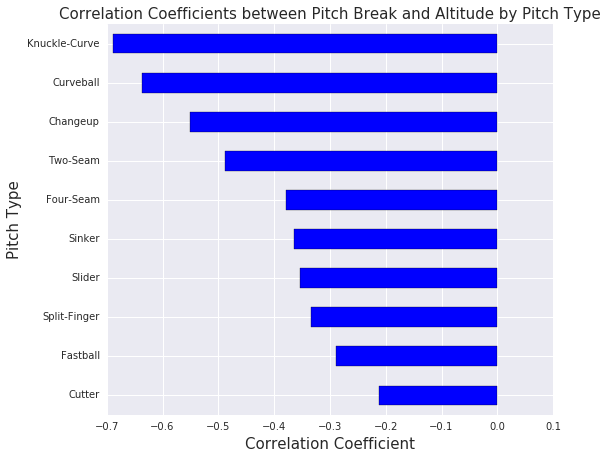

In [370]:
graph = pitch_corr.sort('altitude',ascending = False).altitude.plot(kind = 'barh', figsize = (8,7))
graph.set_ylabel('Pitch Type')
graph.set_xlabel('Correlation Coefficient')
graph.set_title('Correlation Coefficients between Pitch Break and Altitude by Pitch Type')
graph.title.set_fontsize(15)
graph.xaxis.label.set_fontsize(15)
graph.yaxis.label.set_fontsize(15)
graph.set_yticklabels(['Cutter','Fastball','Split-Finger','Slider','Sinker','Four-Seam','Two-Seam','Changeup','Curveball','Knuckle-Curve'])
plt.savefig('elevation_pitch_correlation.png')

In [353]:
import seaborn as sns

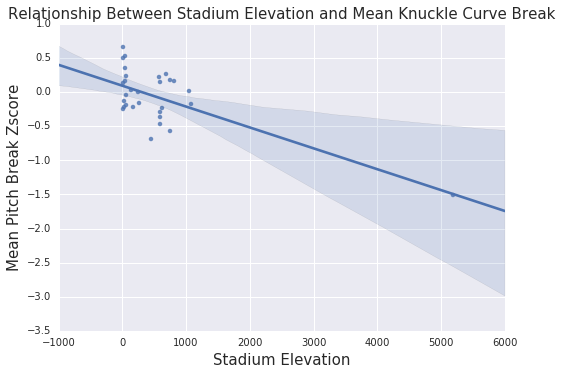

In [362]:
graph = sns.regplot(x = stadium_df.altitude, y = stadium_df.KC)
graph.set_ylabel('Mean Pitch Break Zscore')
graph.set_xlabel('Stadium Elevation')
graph.set_title('Relationship Between Stadium Elevation and Mean Knuckle Curve Break')
graph.title.set_fontsize(15)
graph.xaxis.label.set_fontsize(15)
graph.yaxis.label.set_fontsize(15)
plt.savefig('KC_regplot.png')

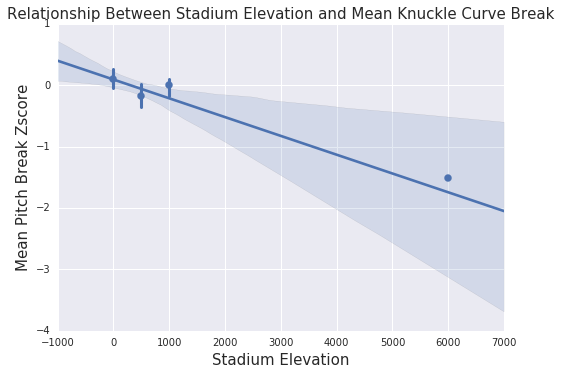

In [387]:
graph = sns.regplot(x = stadium_df.altitude, y = stadium_df.KC, x_bins = ranges, ci = 95)
graph.set_ylabel('Mean Pitch Break Zscore')
graph.set_xlabel('Stadium Elevation')
graph.set_title('Relationship Between Stadium Elevation and Mean Knuckle Curve Break')
graph.title.set_fontsize(15)
graph.xaxis.label.set_fontsize(15)
graph.yaxis.label.set_fontsize(15)

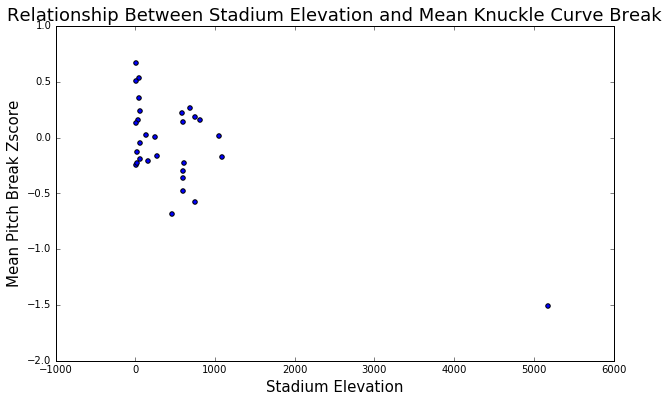

In [351]:
graph = stadium_df.plot(x = 'altitude', y = 'KC', kind = 'scatter', figsize = (10,6))
graph.set_ylabel('Mean Pitch Break Zscore')
graph.set_xlabel('Stadium Elevation')
graph.set_title('Relationship Between Stadium Elevation and Mean Knuckle Curve Break')
graph.title.set_fontsize(18)
graph.xaxis.label.set_fontsize(15)
graph.yaxis.label.set_fontsize(15)

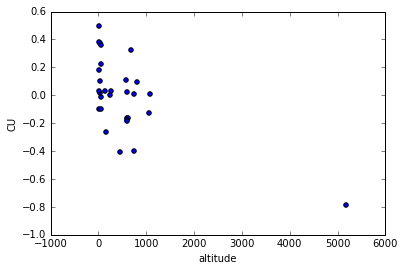

In [34]:
stadium_df.plot(x = 'altitude', y = 'CU', kind = 'scatter')

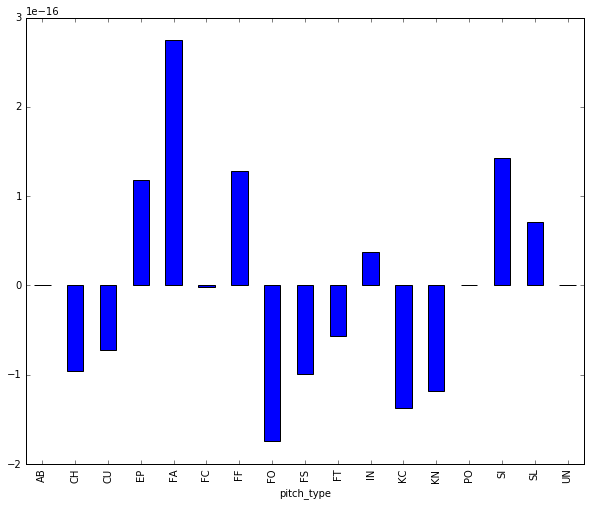

In [35]:
within_pitcher.groupby('pitch_type')['break_zscore'].mean().plot(kind = 'bar', figsize = (10,8))

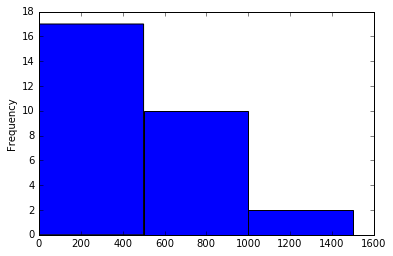

In [302]:
stadium_df.altitude.plot(kind='hist', bins = np.linspace(0,1500,4))

In [309]:
ranges = [0,500,1000,2000,6000]
labels = ['<500','500-1000','1000-2000','2000+']
stadium_df['altitude_bin'] = pd.cut(stadium_df.altitude, ranges, labels = labels).astype('category')

In [310]:
fig

absolute_z_break  break_total  break_zscore     altitude  \
altitude_bin                                                             
<500                  0.789560     9.108974      0.047276    96.823529   
500-1000              0.772113     9.067518     -0.015803   656.700000   
1000-2000             0.708364     8.886909     -0.045205  1066.000000   
2000+                 0.866196     7.270973     -0.573908  5183.000000   

                    FT        FF        SL        CU        CH        FA  \
altitude_bin                                                               
<500          0.067487  0.035343  0.032355  0.080410  0.038583  0.135474   
500-1000     -0.019251 -0.010779 -0.015990 -0.052261 -0.019628  0.005158   
1000-2000    -0.017392 -0.023929 -0.092219 -0.061360 -0.031952  0.171055   
2000+        -0.809609 -0.567741 -0.352209 -0.785030 -0.591854 -0.499669   

                    SI        IN        FC        FS        KC  PO        FO  \
altitude_bin                                                                   
<500          0.037292 -0.067219 -0.008164  0.044610  0.041183 NaN  0.264587   
500-1000      0.023368  0.071233 -0.006919 -0.007409 -0.097808 NaN  0.748343   
1000-2000    -0.026369 -0.022495 -0.138997 -0.126934 -0.079647 NaN       NaN   
2000+        -0.582220 -0.147740 -0.325359 -0.621178 -1.509279 NaN       NaN   

                    EP        KN  UN  AB  
altitude_bin                              
<500         -0.030005  0.050539 NaN NaN  
500-1000      0.118736  0.358616 NaN NaN  
1000-2000          NaN  0.000000 NaN NaN  
2000+        -0.782279       NaN NaN NaN

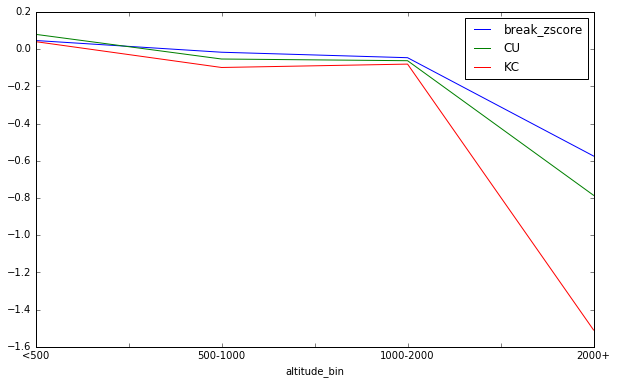

In [330]:
stadium_df.groupby('altitude_bin')[['break_zscore', 'CU', 'KC']].mean().plot(figsize = (10,6))

C:\Users\Steve\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


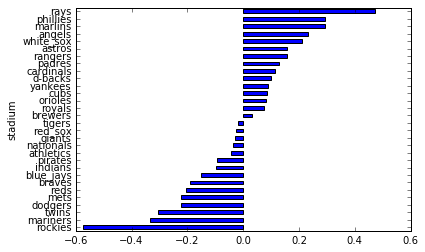

In [315]:
stadium_df.sort('break_zscore').break_zscore.plot(kind = 'barh')

# Batted Ball

In [37]:
within_pitcher.batted_ball_type.value_counts()

GB    6124
LD    3355
FB    2621
PU     885
Name: batted_ball_type, dtype: int64

In [40]:
within_pitcher.groupby('batted_ball_type').batted_ball_velocity.mean()

batted_ball_type
FB    90.133528
GB    85.842489
LD    92.693118
PU    73.682216
Name: batted_ball_velocity, dtype: float64

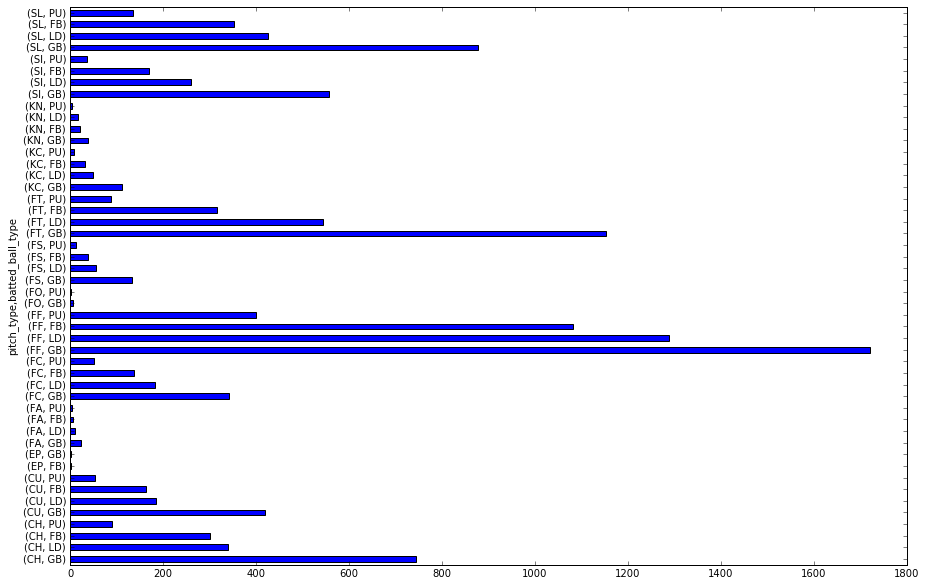

In [46]:
within_pitcher.groupby('pitch_type').batted_ball_type.value_counts().plot(kind = 'barh', figsize = (15,10))

In [39]:
within_pitcher.batted_ball_velocity.describe()

count    31087.000000
mean        88.385338
std         13.799013
min          0.000000
25%         80.000000
50%         91.000000
75%         99.000000
max        118.000000
Name: batted_ball_velocity, dtype: float64

In [75]:
# bin break z score
ranges = np.linspace(-4,4,17)
labels = []
for numbers in ranges:
    labels.append(str(numbers)+':'+str(numbers + .5))
within_pitcher['break_zscore_bin'] = pd.cut(within_pitcher.break_zscore, ranges, labels = labels[:-1]).astype('category')

In [76]:
within_pitcher.break_zscore_bin.value_counts()

-0.5:0.0     13424
0.0:0.5      13387
0.5:1.0      10790
-1.0:-0.5    10775
-1.5:-1.0     6364
1.0:1.5       6354
1.5:2.0       2846
-2.0:-1.5     2789
2.0:2.5        981
-2.5:-2.0      966
2.5:3.0        286
-3.0:-2.5      281
-3.5:-3.0       97
3.0:3.5         66
-4.0:-3.5       27
3.5:4.0         24
dtype: int64

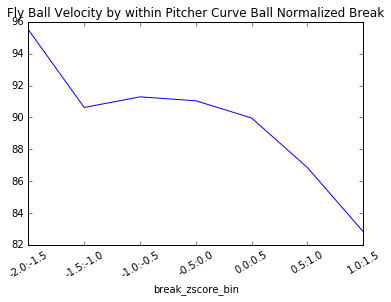

In [241]:
erbar = within_pitcher[(within_pitcher.pitch_type == 'CU') & (within_pitcher.batted_ball_type == 'FB')].groupby('break_zscore_bin').batted_ball_velocity.std()
within_pitcher[(within_pitcher.pitch_type == 'CU') & (within_pitcher.batted_ball_type == 'FB')].groupby('break_zscore_bin').batted_ball_velocity.mean().plot(kind = 'line', xlim = (4,10), title = 'Fly Ball Velocity by within Pitcher Curve Ball Normalized Break', rot = 30)
graph.set_xlabel('Standardized (within Pitcher) Pitch Break Z-Score')
graph.set_ylabel('Distance Ball was Hit (Feet)')
graph.set_title('Average Fly Ball Distance by Standardized Curveball Break')
graph.title.set_fontsize(15)
graph.xaxis.label.set_fontsize(15)
graph.yaxis.label.set_fontsize(15)
plt.savefig('fly_ball_velocity1.png')

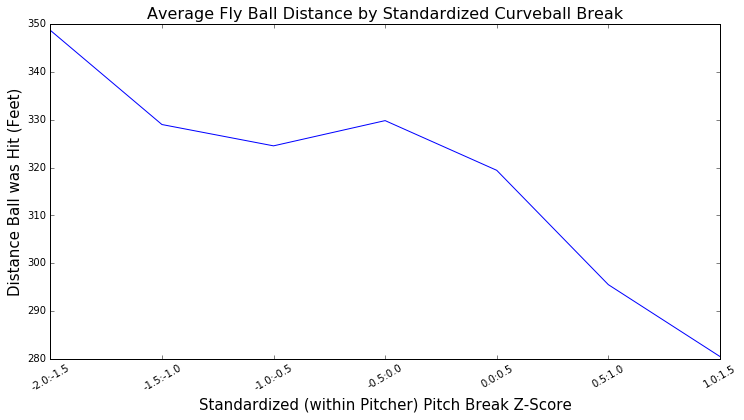

In [253]:
graph = within_pitcher[(within_pitcher.pitch_type == 'CU') & (within_pitcher.batted_ball_type == 'FB')].groupby('break_zscore_bin').distance_feet.mean().plot(kind = 'line', figsize = (12,6), xlim = (4,10), rot = 30)
graph.set_xlabel('Standardized (within Pitcher) Pitch Break Z-Score')
graph.set_ylabel('Distance Ball was Hit (Feet)')
graph.set_title('Average Fly Ball Distance by Standardized Curveball Break')
graph.title.set_fontsize(16)
graph.xaxis.label.set_fontsize(15)
graph.yaxis.label.set_fontsize(15)
plt.savefig('fly_ball_distance.png')

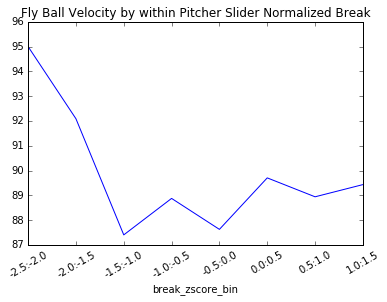

In [112]:
within_pitcher[(within_pitcher.pitch_type == 'SL') & (within_pitcher.batted_ball_type == 'FB')].groupby('break_zscore_bin').batted_ball_velocity.mean().plot(kind = 'line', xlim = (3,10), title = 'Fly Ball Velocity by within Pitcher Slider Normalized Break', rot = 30)

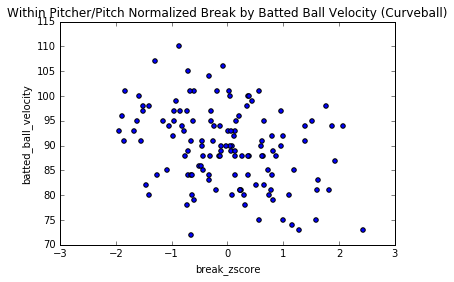

In [56]:
within_pitcher[(within_pitcher.pitch_type == 'CU') & (within_pitcher.batted_ball_type == 'FB')].plot(kind = 'scatter', y = 'batted_ball_velocity', x = 'break_zscore', title = 'Within Pitcher/Pitch Normalized Break by Batted Ball Velocity (Curveball)')

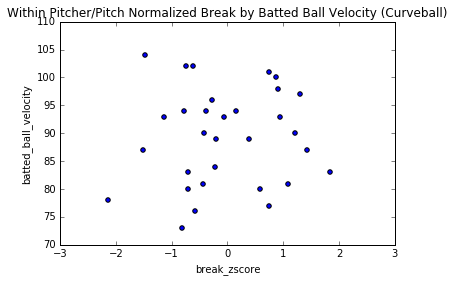

In [94]:
within_pitcher[(within_pitcher.pitch_type == 'KC') & (within_pitcher.batted_ball_type == 'FB')].plot(kind = 'scatter', y = 'batted_ball_velocity', x = 'break_zscore', title = 'Within Pitcher/Pitch Normalized Break by Batted Ball Velocity (Curveball)')

In [52]:
within_pitcher[within_pitcher.pitch_type == 'CU'][['batted_ball_velocity', 'break_zscore' ]].corr()

batted_ball_velocity  break_zscore
batted_ball_velocity              1.000000      0.005539
break_zscore                      0.005539      1.000000

# Pitch Result

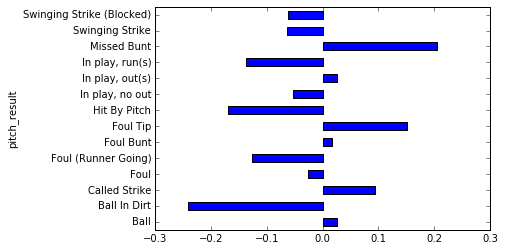

In [107]:
within_pitcher[(within_pitcher.pitch_type == 'CU')].groupby('pitch_result').break_zscore.mean().plot(kind = 'barh')

In [111]:
pd.crosstab(index = within_pitcher.pitch_result, columns = within_pitcher.break_zscore_bin)

break_zscore_bin           -4.0:-3.5  -3.5:-3.0  -3.0:-2.5  -2.5:-2.0  \
pitch_result                                                            
Automatic Ball                     0          0          0          0   
Ball                               8         36        104        353   
Ball In Dirt                       2          4          6         26   
Called Strike                      4         13         39        129   
Foul                               7         12         49        150   
Foul (Runner Going)                0          0          0          6   
Foul Bunt                          0          0          0          1   
Foul Tip                           0          0          2          9   
Hit By Pitch                       0          0          3          3   
In play, no out                    1          3          8         47   
In play, out(s)                    3         17         36        126   
In play, run(s)                    1          5          8         25   
Intent Ball                        0          0          0          0   
Missed Bunt                        0          0          1          0   
Pitchout                           0          0          0          0   
Swinging Strike                    0          7         22         81   
Swinging Strike (Blocked)          1          0          3         10   

break_zscore_bin           -2.0:-1.5  -1.5:-1.0  -1.0:-0.5  -0.5:0.0  0.0:0.5  \
pitch_result                                                                    
Automatic Ball                     0          0          0         0        0   
Ball                             936       2166       3488      4373     4412   
Ball In Dirt                      62        139        238       253      292   
Called Strike                    419        947       1725      2196     2328   
Foul                             487       1062       1878      2346     2221   
Foul (Runner Going)               12         21         37        47       44   
Foul Bunt                          8         18         39        43       42   
Foul Tip                          27         60        101       108      115   
Hit By Pitch                       8         12         30        25       22   
In play, no out                  122        305        492       645      605   
In play, out(s)                  357        814       1365      1704     1604   
In play, run(s)                   74        163        237       284      338   
Intent Ball                        0         14         73        17       11   
Missed Bunt                        3          4          8        11       10   
Pitchout                           0          0          0         0        0   
Swinging Strike                  240        585        965      1247     1234   
Swinging Strike (Blocked)         34         54         99       125      109   

break_zscore_bin           0.5:1.0  1.0:1.5  1.5:2.0  2.0:2.5  2.5:3.0  \
pitch_result                                                             
Automatic Ball                   0        0        0        0        0   
Ball                          3567     2255     1013      364      123   
Ball In Dirt                   219      176       86       42        9   
Called Strike                 1961     1173      552      190       55   
Foul                          1784     1047      456      133       30   
Foul (Runner Going)             36       22        7        2        0   
Foul Bunt                       30       16        9        1        1   
Foul Tip                       107       54       21       10        2   
Hit By Pitch                    16        9        6        2        0   
In play, no out                437      210       94       37       11   
In play, out(s)               1256      659      274       99       26   
In play, run(s)                228      110       57       18        5   
Intent Ball                     68  

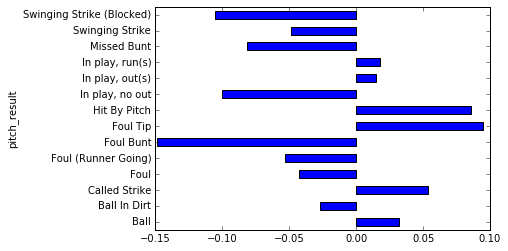

In [109]:
within_pitcher[(within_pitcher.pitch_type == 'SL')].groupby('pitch_result').break_zscore.mean().plot(kind = 'barh')

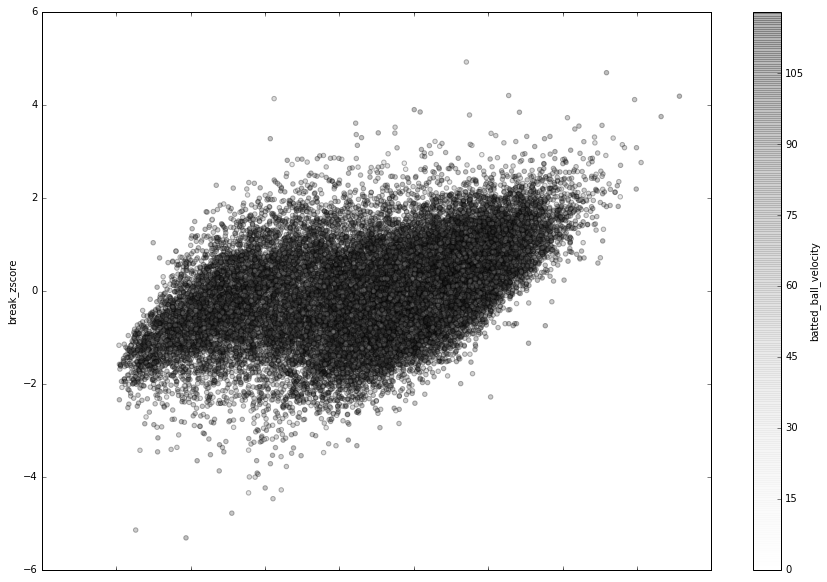

In [140]:
within_pitcher.plot(kind = 'scatter', x ='spin_rate', y = 'break_zscore', alpha = .3, figsize = (15,10), c = 'batted_ball_velocity')

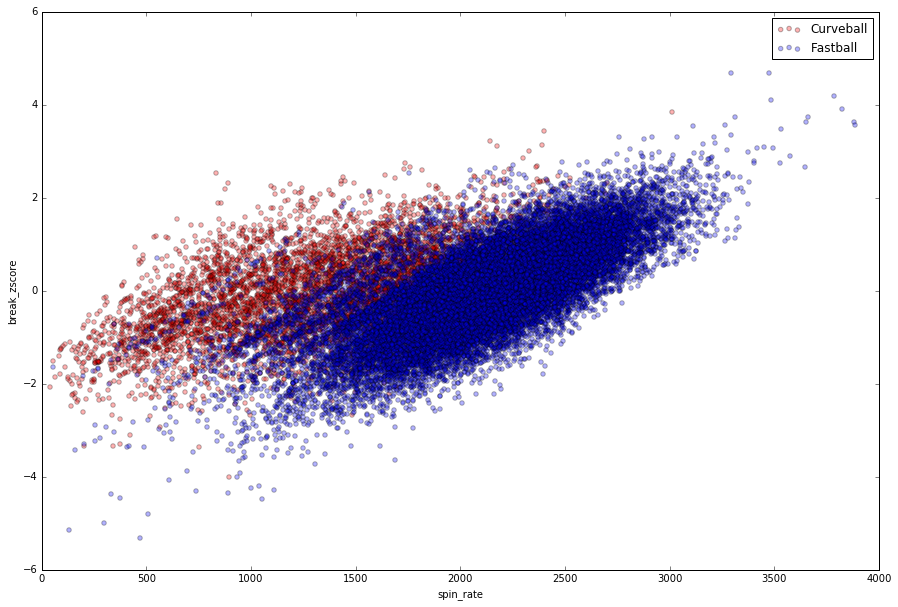

In [142]:
ax = within_pitcher[within_pitcher.pitch_type == 'CU'].plot(kind = 'scatter', x ='spin_rate', y = 'break_zscore', color = 'Red', alpha =.3, label = 'Curveball')
within_pitcher[within_pitcher.pitch_type == 'FF'].plot(kind = 'scatter', x ='spin_rate', y = 'break_zscore', ax = ax, alpha = .3, figsize = (15,10), xlim = (0,4000), label = 'Fastball')

In [187]:
within_pitcher.pitch_type.value_counts()

FF    25205
SL    10213
FT     9585
CH     7229
CU     5414
SI     4983
FC     3704
KC     1480
FS     1087
KN      367
IN      346
FA      282
FO       42
EP       25
PO       22
UN        3
AB        3
Name: pitch_type, dtype: int64

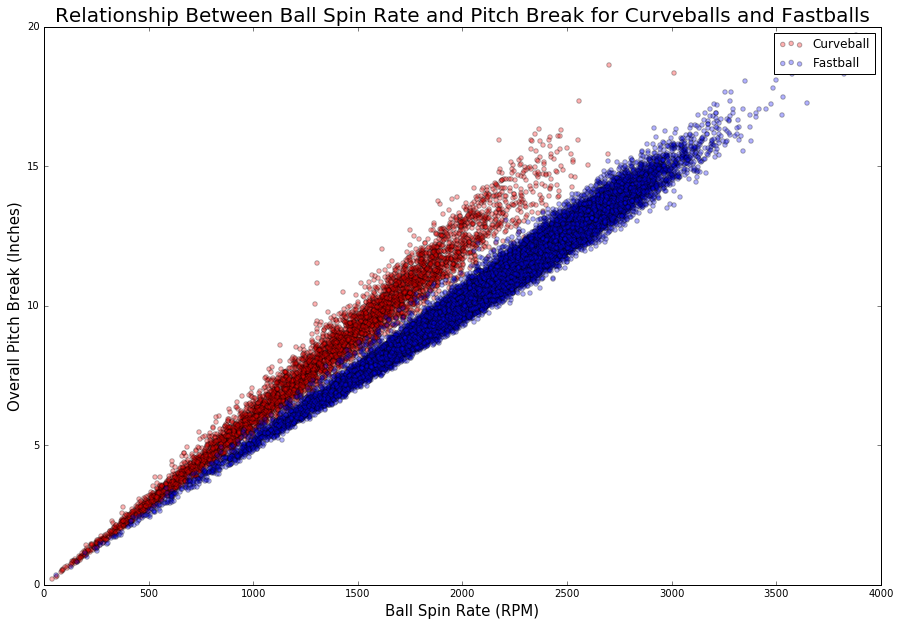

In [223]:
ax1 = within_pitcher[within_pitcher.pitch_type == 'CU'].plot(kind = 'scatter', x ='spin_rate', y = 'break_total', color = 'Red', alpha =.3, label = 'Curveball')
#within_pitcher[within_pitcher.pitch_type == 'SL'].plot(kind = 'scatter', x ='spin_rate', y = 'break_total', color = 'Green', alpha =.3, label = 'Changeup', ax = ax1)
graph = within_pitcher[within_pitcher.pitch_type == 'FF'].plot(kind = 'scatter', x ='spin_rate', y = 'break_total', ax = ax1, alpha = .3, figsize = (15,10), xlim = (0,4000), label = 'Fastball', ylim = (0,20))
graph.set_ylabel('Overall Pitch Break (Inches)')
graph.set_xlabel('Ball Spin Rate (RPM)')
graph.set_title('Relationship Between Ball Spin Rate and Pitch Break for Curveballs and Fastballs')
graph.title.set_fontsize(20)
graph.xaxis.label.set_fontsize(15)
graph.yaxis.label.set_fontsize(15)
plt.savefig('magnus_effect.png')

In [210]:
?graph.set_title('Ball Spin Rate (RPM)')

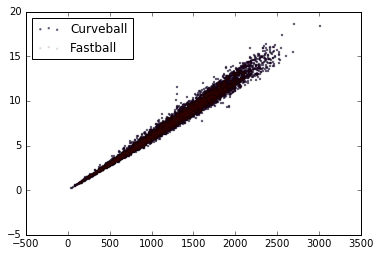

In [179]:
x1 = within_pitcher[within_pitcher.pitch_type == 'CU'].spin_rate
y1 = within_pitcher[within_pitcher.pitch_type == 'CU'].break_total
x2 = within_pitcher[within_pitcher.pitch_type == 'FF'].spin_rate
y2 = within_pitcher[within_pitcher.pitch_type == 'FF'].break_total
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, s=2, c='b', label='Curveball', alpha = .5)
ax1.scatter(x1, y1, s=2, c='r', label='Fastball', alpha = .1)
plt.legend(loc='upper left');
plt.show()

In [103]:
legend

field                               description of field  \
0                   name                                       PITCHER NAME   
1              player_id                                UNIQUE PITCHER ID #   
2             pitch_type     PITCH THROWN (FASTBALL, CHANGEUP, SLIDER, ETC)   
3           pitch_result  RESULT OF PITCH (SWINGING STRIKE, BALL IN PLAY...   
4           atbat_result  RESULT OF AT BAT (STRIKEOUT, GROUNDOUT, DOUBLE...   
5            start_speed                INITIAL VELOCITY AT PITCHER RELEASE   
6                     z0                          HEIGHT OF PITCHER RELEASE   
7                     x0  (LEFT)/RIGHT DISTANCE TO CENTER OF PITCHER REL...   
8                  pfx_x  (LEFT)/RIGHT BREAK BETWEEN PITCHER RELEASE AND...   
9                  pfx_z  (DOWN)/UP BREAK BETWEEN PITCHER RELEASE AND HO...   
10                    px  (LEFT)/RIGHT DISTANCE TO CENTER OF PLATE WHEN ...   
11                    pz                     HEIGHT WHEN BALL CROSSES PLATE   
12           break_angle                               ANGLE OF PITCH BREAK   
13          break_length  GREATEST DISTANCE BETWEEN TRAJECTORY OF PITCH ...   
14             spin_rate                            REVOLUTIONS OF BASEBALL   
15              spin_dir                        ANGLE OF AXIS OF REVOLUTION   
16                  zone  PRE-MAPPED ZONE OF WHICH STRIKE ZONE BIN BALL ...   
17                 balls            NUMBER OF BALLS IN COUNT (BEFORE PITCH)   
18               strikes          NUMBER OF STRIKES IN COUNT (BEFORE PITCH)   
19                  outs             NUMBER OF OUTS IN COUNT (BEFORE PITCH)   
20                  play           DETAILED DESCRIPTION OF RESULT OF AT BAT   
21             game_date                                          GAME DATE   
22                inning                                    INNING OF PITCH   
23         inning_topbot                            TOP OR BOTTOM OF INNING   
24                   tfs                                                TBD   
25              tfs_zulu                                 TIME STAMP OF GAME   
26               catcher                                    CATCH UNIQUE ID   
27                umpire                                   UMPIRE UNIQUE ID   
28           umpire_name                                        UMPIRE NAME   
29   stolen_base_attempt                      STOLEN BASE ATTEMPT ON PITCH?   
30   stolen_base_success           SUCCESSFUL STOLEN BASE ATTEMPT ON PITCH?   
31      batted_ball_type  TYPE OF HIT CONNECTION (GROUNDBALL, FLY BALL, ...   
32           Unnamed: 32                                                TBD   
33                 angle                                                TBD   
34  batted_ball_velocity                                    VELOCITY OF HIT   
35             direction                                                TBD   
36                  hc_x                                                TBD   
37                  hc_y                                                TBD   
38              pitch_id                UNIQUE PITCH IDENTIFICATION NUMBER?   
39         distance_feet          LANDING POINT OF HIT? WHERE BALL STOPPED?   
40               stadium                        STADIUM PITCH WAS THROWN AT   

   unit of measurement  
0                  NaN  
1                  NaN  
2                  NaN  
3                  NaN  
4                  NaN  
5                  NaN  
6                   FT  
7                   FT  
8                   IN  
9                   IN  
10                  FT  
11                  FT  
12             DEGREES  
13                  IN  
14            REV/MIN?  
15             DEGREES  
16                 NaN  
17                 NaN  
18                 NaN  
19                 NaN  
20                 NaN  
21                 NaN  
22                 NaN  
23                 NaN  
24                 NaN  
25                 NaN  
26                 NaN  


# Break Angle

In [13]:
data['break_angle'].describe()

count    69990.000000
mean         4.453571
std         24.115657
min        -75.100000
25%        -13.100000
50%          6.100000
75%         25.300000
max         97.300000
Name: break_angle, dtype: float64

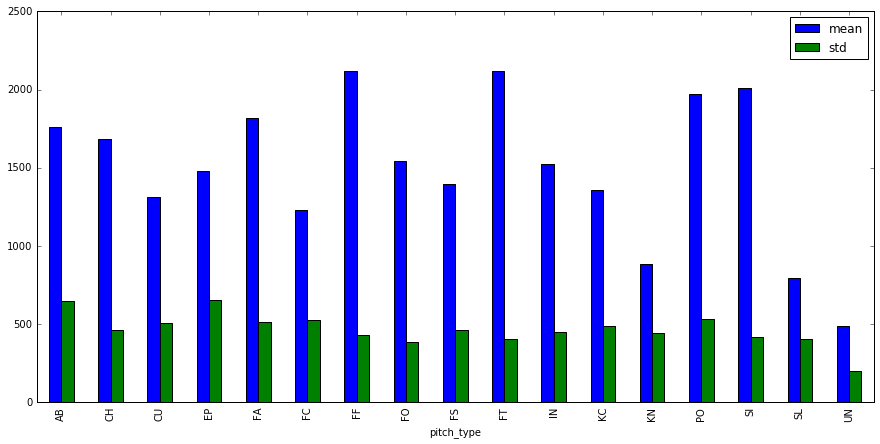

In [20]:
data.groupby('pitch_type').spin_rate.agg([np.mean, np.std]).plot(kind = 'bar', figsize = (15, 7))

# Weather shit

In [1]:
within_pitcher.columns

NameError: name 'within_pitcher' is not defined

In [406]:
within_pitcher.tfs_zulu.value_counts()

2015-05-24T20:11:15Z    3
2015-08-02T00:29:11Z    3
2015-08-13T01:04:52Z    3
2015-05-20T01:28:13Z    2
2015-07-26T01:01:50Z    2
2015-09-17T23:21:43Z    2
2015-08-15T02:04:51Z    2
2015-06-21T00:20:52Z    2
2015-04-19T18:38:57Z    2
2015-07-19T00:25:45Z    2
2015-07-19T00:35:46Z    2
2015-06-21T19:55:03Z    2
2015-06-24T04:07:07Z    2
2015-05-09T04:18:11Z    2
2015-09-23T02:29:03Z    2
2015-04-15T18:22:17Z    2
2015-04-15T18:12:32Z    2
2015-08-15T02:39:49Z    2
2015-05-01T23:40:21Z    2
2015-05-17T00:04:34Z    2
2015-07-12T17:19:16Z    2
2015-09-20T22:30:35Z    2
2015-07-25T23:18:47Z    2
2015-09-30T02:42:40Z    2
2015-09-23T00:24:55Z    2
2015-05-31T18:24:36Z    2
2015-10-04T19:54:40Z    2
2015-09-16T00:39:17Z    2
2015-06-04T01:50:42Z    2
2015-09-02T01:27:04Z    2
                       ..
2015-07-11T21:21:00Z    1
2015-08-22T01:10:12Z    1
2015-04-15T00:16:08Z    1
2015-07-18T01:29:32Z    1
2015-07-05T18:21:39Z    1
2015-05-10T19:38:03Z    1
2015-06-19T03:09:49Z    1
2015-04-07T2

In [408]:
within_pitcher.tfs_zulu.head()

0    2015-08-23T22:22:18Z
1    2015-07-01T04:13:06Z
2    2015-07-01T04:28:41Z
3    2015-07-01T04:29:08Z
4    2015-07-01T04:08:01Z
Name: tfs_zulu, dtype: object

In [423]:
str(within_pitcher.tfs_zulu)

'0        2015-08-23T22:22:18Z\n1        2015-07-01T04:13:06Z\n2        2015-07-01T04:28:41Z\n3        2015-07-01T04:29:08Z\n4        2015-07-01T04:08:01Z\n5        2015-06-16T05:01:05Z\n6        2015-06-16T05:01:20Z\n7        2015-05-31T04:45:45Z\n8        2015-05-31T04:39:35Z\n9        2015-05-31T04:35:23Z\n10       2015-05-29T05:01:49Z\n11       2015-05-29T04:58:53Z\n12       2015-06-02T02:38:38Z\n13       2015-06-02T03:47:58Z\n14       2015-06-02T03:51:12Z\n15       2015-06-02T02:56:55Z\n16       2015-06-02T04:10:08Z\n17       2015-06-02T02:42:33Z\n18       2015-06-02T02:38:10Z\n19       2015-06-02T03:04:33Z\n20       2015-06-02T02:17:46Z\n21       2015-07-21T04:00:46Z\n22       2015-07-21T03:59:42Z\n23       2015-05-31T03:26:27Z\n24       2015-05-31T03:28:07Z\n25       2015-05-31T03:29:09Z\n26       2015-05-31T03:37:47Z\n27       2015-06-02T04:52:26Z\n28       2015-06-02T04:48:03Z\n29       2015-05-28T03:23:39Z\n                 ...         \n70176    2015-09-05T19:46:22Z\n70177  

In [ ]:
within_pitcher['split_test'] = within_pitcher.tfs_zulu.str.split('T')[0]

In [ ]:
within_pitcher.split_test.value_counts()

In [ ]:
def master_key(dataframe):
    stadium = str(dataframe.stadium)
    date = dataframe.tfs_zulu.split('T')

In [417]:
'f1eeee'.split('1')

['f', 'eeee']

In [411]:
weather = pd.read_csv('Clean_Weather.csv', parse_dates='gmt')

In [412]:
weather.head()

Unnamed: 0 stationID                  gmt  tempF  relhum  altibarom
0           0      KLGA  2015-10-11 04:51:00     57      62      30.07
1           1      KLGA  2015-10-11 03:51:00     57      57      30.08
2           2      KLGA  2015-10-11 02:51:00     57      55      30.08
3           3      KLGA  2015-10-11 01:51:00     59      48      30.07
4           4      KLGA  2015-10-11 00:51:00     60      46      30.09

In [414]:
weather.dtypes

Unnamed: 0      int64
stationID      object
gmt            object
tempF           int64
relhum          int64
altibarom     float64
dtype: object